<h1 align="center">Machine Learning for NLP</h1>
    <h2 align="center">Feature Extraction for Text</h2>
    <h3 align="center">Zahra Amini</h3>
<div style="width: 100%; text-align: center;">
    <table>
        <tr>
            <td>
                <a class="link" href="https://t.me/Zahraamini_ai">Telegram</a><br>
                <a class="link" href="https://www.linkedin.com/in/zahraamini-ai/">LinkedIn</a><br>
                <a class="link" href="https://www.youtube.com/@AcademyHobot">YouTube</a><br>
            </td>
            <td>
                <a class="link" href="https://github.com/aminizahra">GitHub</a><br>
                <a class="link" href="https://www.kaggle.com/aminizahra">Kaggle</a><br>
                <a class="link" href="https://www.instagram.com/zahraamini_ai/">Instagram</a><br>
            </td>
        </tr>
    </table>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
import random
import seaborn as sns

In [3]:
# Setting up a small dataset
data = pd.DataFrame({
    'text': [
        'The football match was exciting and full of surprises.',
        'Artificial intelligence is transforming the tech industry.',
        'The government announced new policies for the economy.',
        'Our team won the championship this year!',
        'Machine learning and AI are the future of technology.',
        'The president held a press conference on national issues.',
        'Basketball players need excellent coordination and speed.',
        'Blockchain technology is changing financial systems.'
    ],
    'label': ['sports', 'technology', 'politics', 'sports', 'technology', 'politics', 'sports', 'technology']
})

In [5]:
# Define colors for different labels
label_colors = {'sports': 'blue', 'technology': 'green', 'politics': 'red'}

# Helper function to plot 2D vectors
def plot_2d_vectors(data_2d, labels, title):
    plt.figure(figsize=(10, 8))
    for i, (x, y) in enumerate(data_2d):
        plt.arrow(0, 0, x, y, color='gray', alpha=0.5, head_width=0.05, head_length=0.1)
        plt.plot(x, y, 'o', color=label_colors[labels[i]], markersize=10)
        plt.text(x + 0.1, y, labels[i], fontsize=12, color=label_colors[labels[i]])
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.show()

# Helper function to plot 3D vectors
def plot_3d_vectors(data_3d, labels, title):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i, (x, y, z) in enumerate(data_3d):
        ax.quiver(0, 0, 0, x, y, z, color='gray', alpha=0.5, arrow_length_ratio=0.1)
        ax.scatter(x, y, z, color=label_colors[labels[i]], s=50)
        ax.text(x, y, z, labels[i], fontsize=12, color=label_colors[labels[i]])
    ax.set_title(title)
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.set_zlabel("Component 3")
    plt.show()

In [13]:
count_vectorize = CountVectorizer(ngram_range=(1, 2))
X_bow = count_vectorize.fit_transform(data['text']).toarray()

In [17]:
bow_features = count_vectorize.get_feature_names_out()

In [19]:
bow_df = pd.DataFrame(X_bow, columns=bow_features)
bow_df

,ai,ai are,and,and ai,and full,and speed,announced,announced new,are,are the,...,the tech,this,this year,transforming,transforming the,was,was exciting,won,won the,year
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,1
4,1,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
pca_2d = PCA(n_components=2)
X_bow_2d = pca_2d.fit_transform(X_bow)

pca_3d = PCA(n_components=3)
X_bow_3d = pca_3d.fit_transform(X_bow)

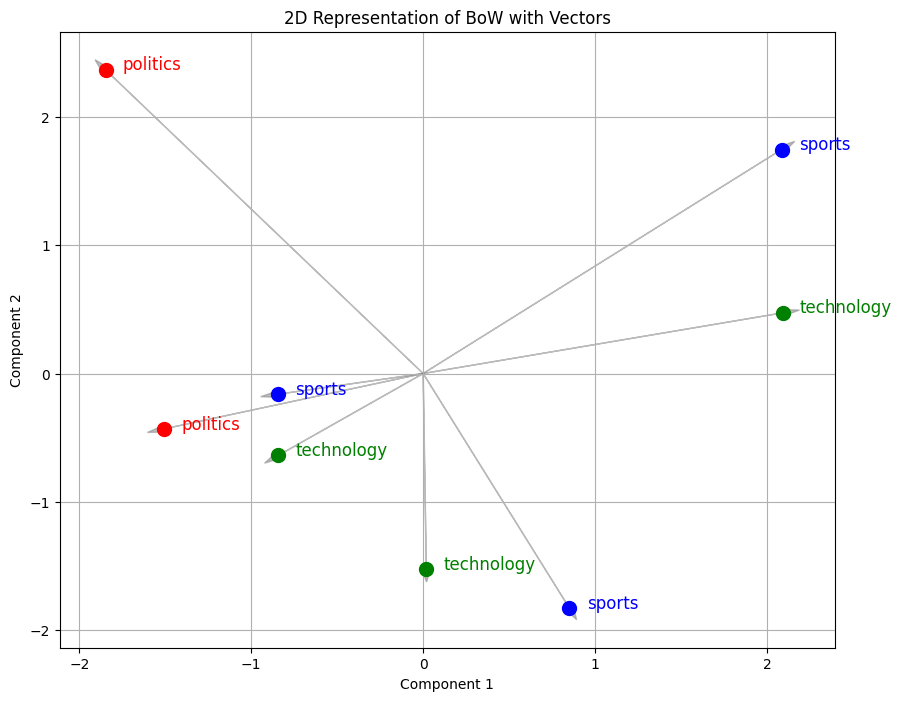

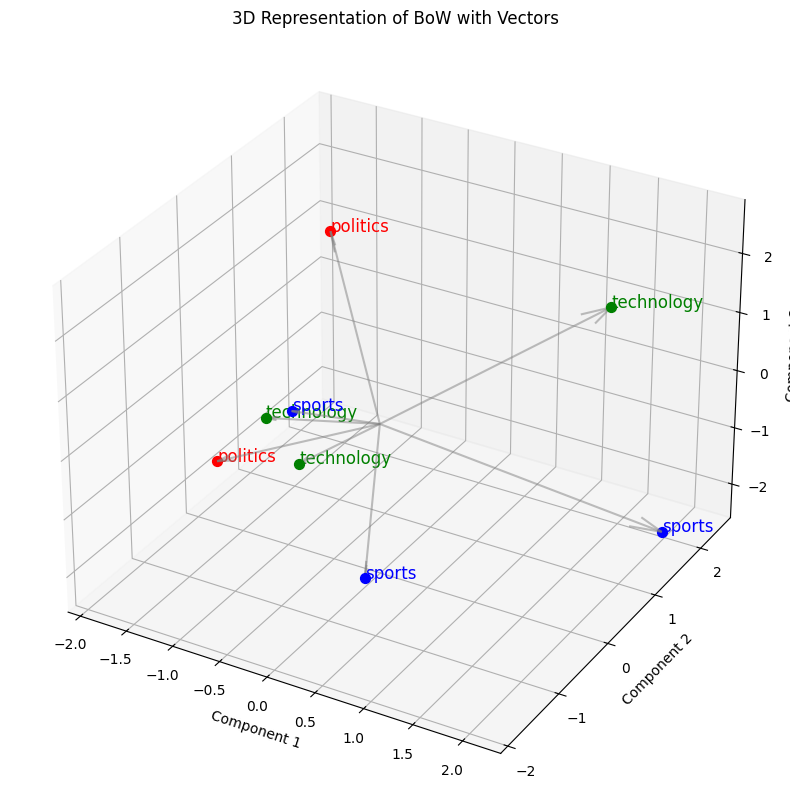

In [23]:
plot_2d_vectors(X_bow_2d, data['label'], "2D Representation of BoW with Vectors")
plot_3d_vectors(X_bow_3d, data['label'], "3D Representation of BoW with Vectors")

In [25]:
tfidf_vectorizer = TfidfVectorizer()

In [27]:
X_tfidf = tfidf_vectorizer.fit_transform(data['text']).toarray()

In [37]:
tfidf_features = tfidf_vectorizer.get_feature_names_out()

In [39]:
tfidf_features

array(['ai', 'and', 'announced', 'are', 'artificial', 'basketball',
       'blockchain', 'championship', 'changing', 'conference',
       'coordination', 'economy', 'excellent', 'exciting', 'financial',
       'football', 'for', 'full', 'future', 'government', 'held',
       'industry', 'intelligence', 'is', 'issues', 'learning', 'machine',
       'match', 'national', 'need', 'new', 'of', 'on', 'our', 'players',
       'policies', 'president', 'press', 'speed', 'surprises', 'systems',
       'team', 'tech', 'technology', 'the', 'this', 'transforming', 'was',
       'won', 'year'], dtype=object)

In [31]:
# X_tfidf

In [33]:
tfidf_sums = X_tfidf.sum(axis=0)

In [41]:
tfidf_df = pd.DataFrame({'word': tfidf_features, 'tfidf_sum': tfidf_sums})

In [43]:
tfidf_df

,word,tfidf_sum
0,ai,0.373263
1,and,0.817612
2,announced,0.377996
3,are,0.373263
4,artificial,0.409888
5,basketball,0.391540
6,blockchain,0.430142
7,championship,0.400009
8,changing,0.430142
9,conference,0.371398


In [45]:
X_tfidf_2d = pca_2d.fit_transform(X_tfidf)
X_tfidf_3d = pca_3d.fit_transform(X_tfidf)

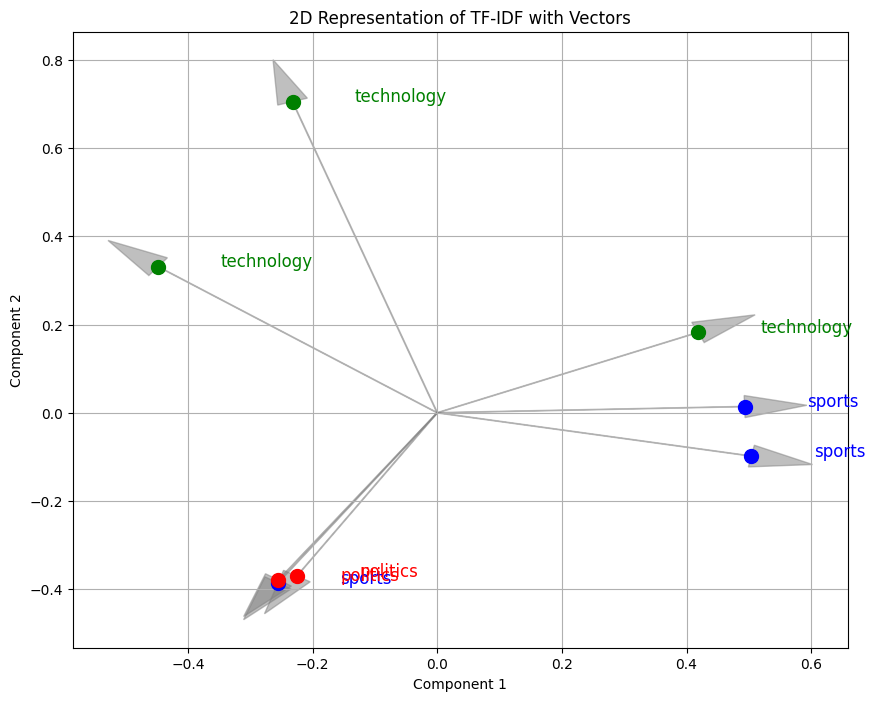

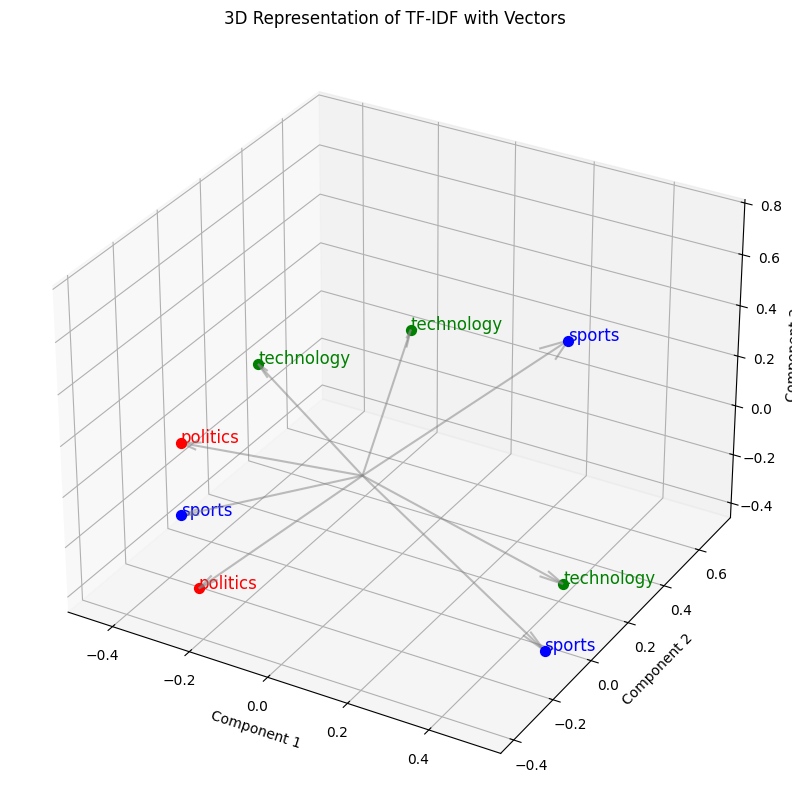

In [47]:
plot_2d_vectors(X_tfidf_2d, data['label'], "2D Representation of TF-IDF with Vectors")
plot_3d_vectors(X_tfidf_3d, data['label'], "3D Representation of TF-IDF with Vectors")

In [49]:
sentences = [text.split() for text in data['text']]

In [51]:
sentences

[['The',
  'football',
  'match',
  'was',
  'exciting',
  'and',
  'full',
  'of',
  'surprises.'],
 ['Artificial',
  'intelligence',
  'is',
  'transforming',
  'the',
  'tech',
  'industry.'],
 ['The',
  'government',
  'announced',
  'new',
  'policies',
  'for',
  'the',
  'economy.'],
 ['Our', 'team', 'won', 'the', 'championship', 'this', 'year!'],
 ['Machine',
  'learning',
  'and',
  'AI',
  'are',
  'the',
  'future',
  'of',
  'technology.'],
 ['The',
  'president',
  'held',
  'a',
  'press',
  'conference',
  'on',
  'national',
  'issues.'],
 ['Basketball',
  'players',
  'need',
  'excellent',
  'coordination',
  'and',
  'speed.'],
 ['Blockchain', 'technology', 'is', 'changing', 'financial', 'systems.']]

In [53]:
word2vec_model = Word2Vec(sentences, vector_size=10, window=3, min_count=1)

In [59]:
# [word2vec_model.wv[word] for word in sentences]

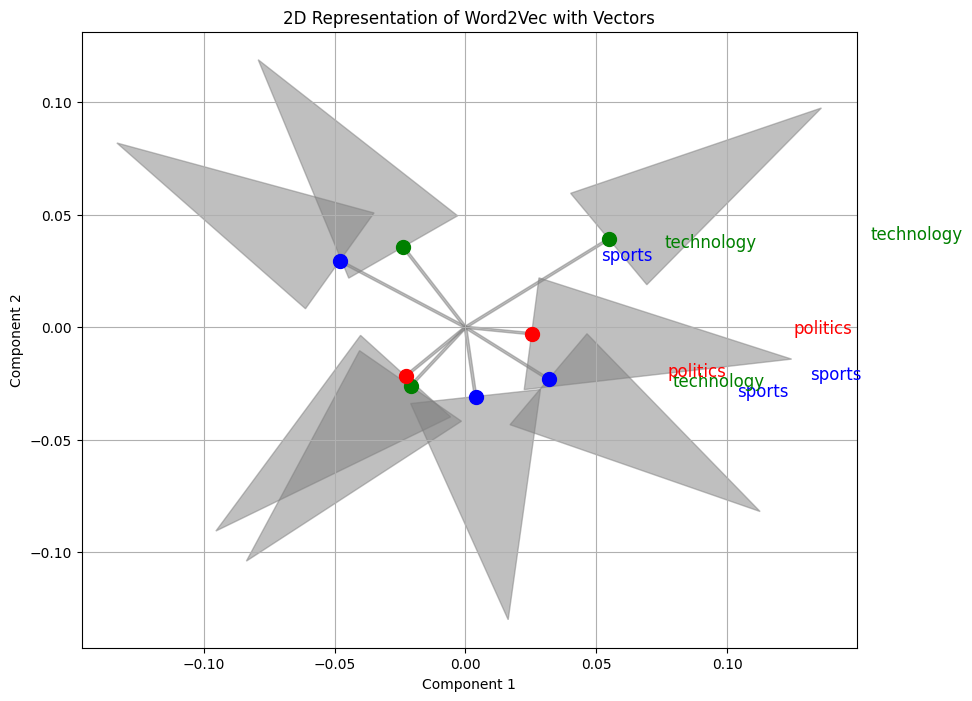

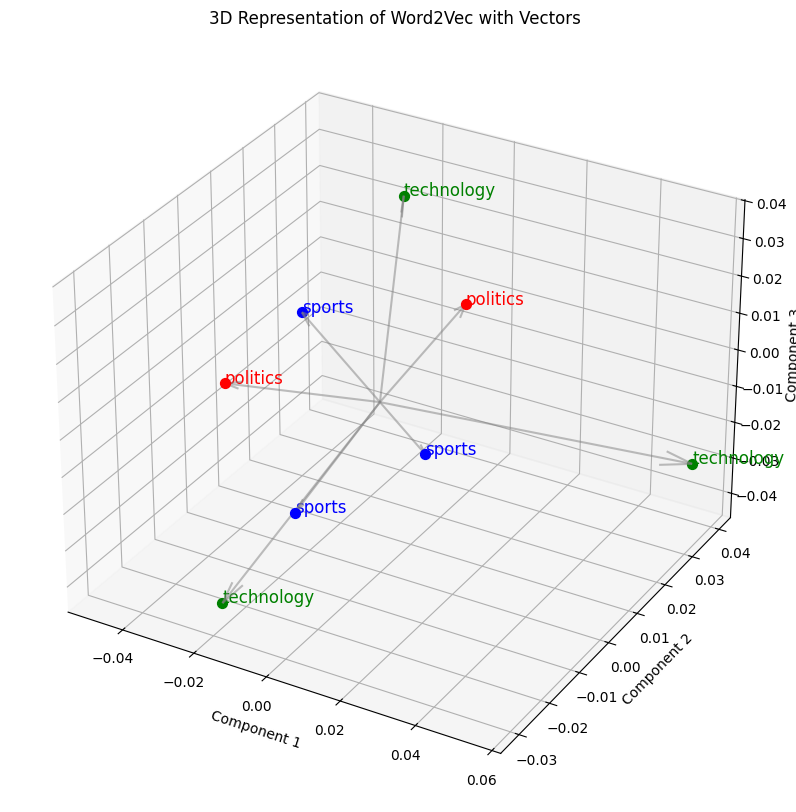

In [61]:
X_word2vec = np.array([np.mean([word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv] or [np.zeros(10)], axis=0) for sentence in sentences])

# Reducing dimensions
X_word2vec_2d = pca_2d.fit_transform(X_word2vec)
X_word2vec_3d = pca_3d.fit_transform(X_word2vec)

# Plotting 2D and 3D for Word2Vec
plot_2d_vectors(X_word2vec_2d, data['label'], "2D Representation of Word2Vec with Vectors")
plot_3d_vectors(X_word2vec_3d, data['label'], "3D Representation of Word2Vec with Vectors")